### Iniciar el servidor

Para iniciar el servidor virtual, *instalar* la base de datos postgres debe correr el siguiente bloque:

In [ ]:
# install
!apt update
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://@/postgres

**Diagrama ER planteado para el proyecto Administración académica instituto Fantasilandia:**

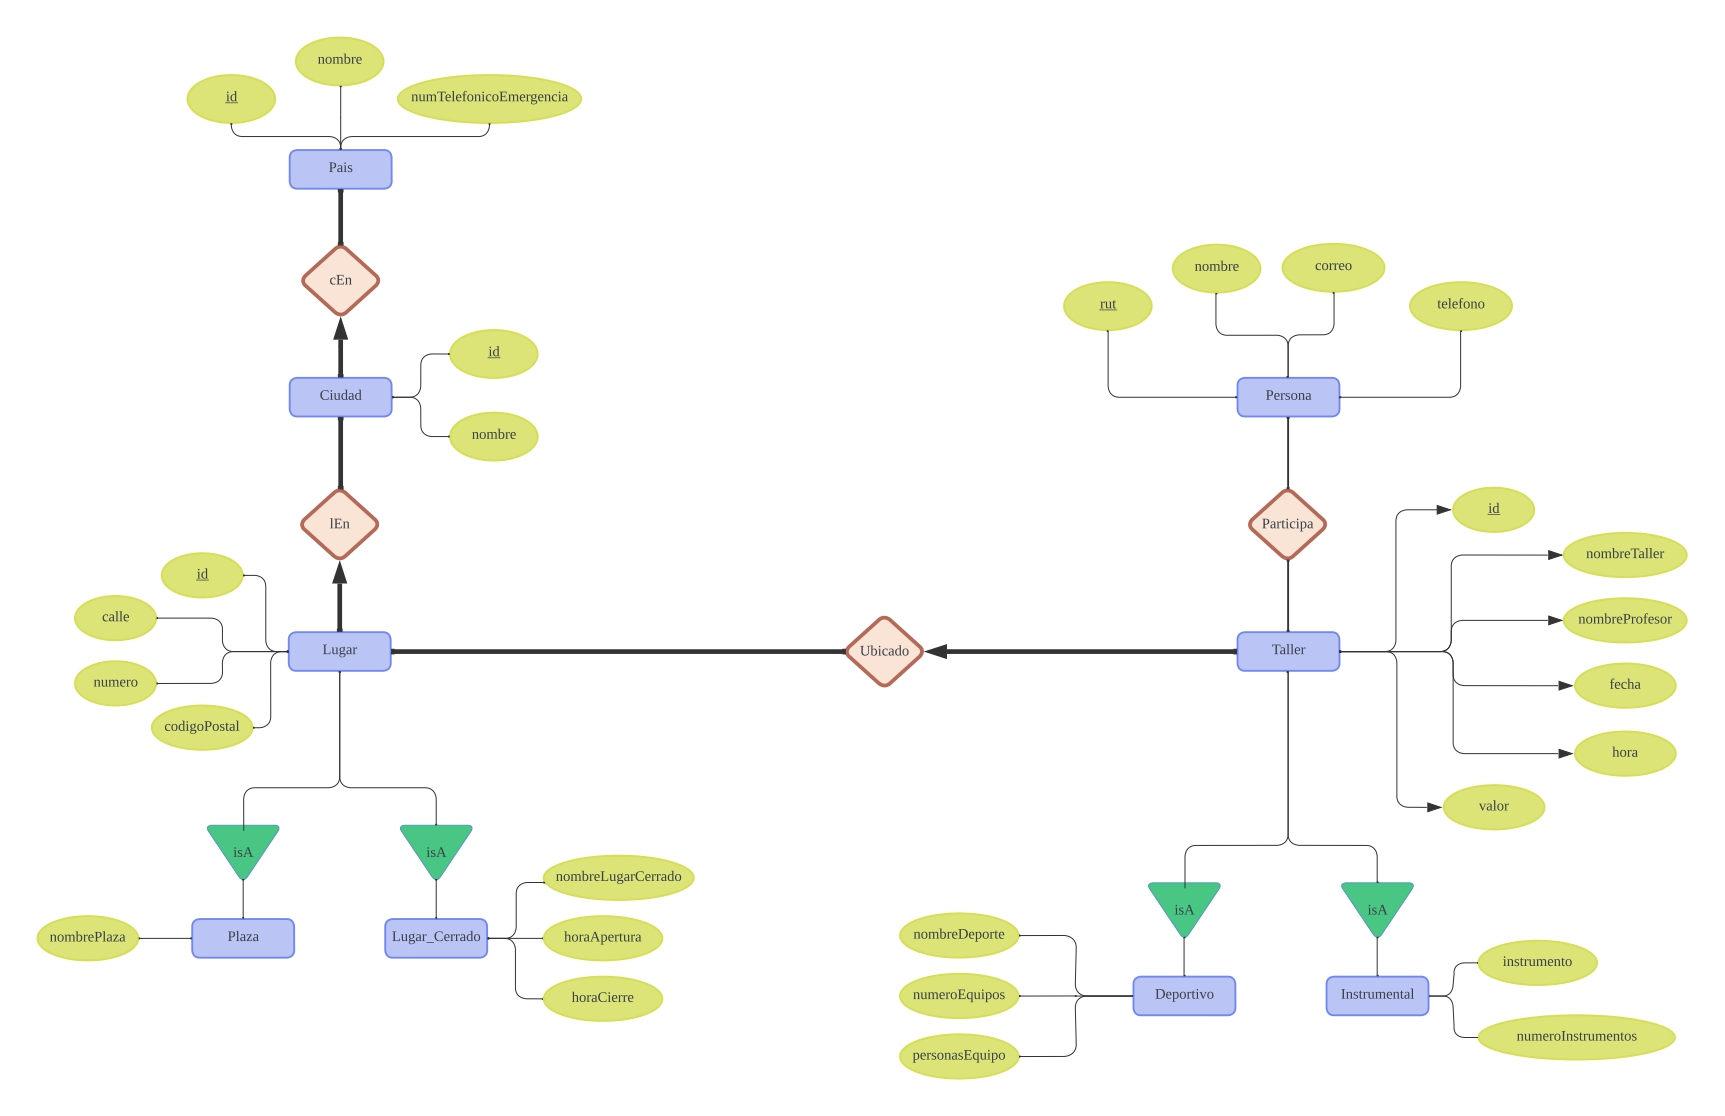

### Plasmar el diagrama ER en sentencias SQL:

Para crear el esquema de datos que se planteó en el diagrama ER, se debe correr los siguientes bloques de código: 

---

In [ ]:
#Creación tabla Persona, Taller (Tablas hijas Deportiva e Instrumental) y relación (Persona-Taller):
%%sql
CREATE TABLE IF NOT EXISTS Persona(
    rut varchar(20) PRIMARY KEY,
    nombre varchar(30),
    correo varchar(30),
    telefono varchar(30)
);

CREATE TABLE IF NOT EXISTS Taller(
    id int PRIMARY KEY,
    nombreTaller varchar(30),
    nombreProfesor varchar(30),
    fecha date,
    hora time,
    valor float
);

CREATE TABLE IF NOT EXISTS Deportivo(
    id int,  
    nombreDeporte varchar(40), 
    numeroEquipos smallint,
    personasEquipo smallint,
    PRIMARY KEY (id),
    FOREIGN KEY (id) REFERENCES Taller(id)
);

CREATE TABLE IF NOT EXISTS Instrumental(
    id int,
    instrumento varchar(40), 
    numeroInstrumentos smallint,
    PRIMARY KEY (id),
    FOREIGN KEY (id) REFERENCES Taller(id)
);

CREATE TABLE IF NOT EXISTS Participa(
    rutPersona varchar(20),
    idTaller int,
    PRIMARY KEY (rutPersona, idTaller),
    FOREIGN KEY (rutPersona) REFERENCES Persona(rut),
    FOREIGN KEY (idTaller) REFERENCES Taller(id)
);

In [ ]:
#Creación tabla Lugar (Tablas hijas Plaza y Lugar_Cerrado), Ciudad y País (Pais).
%%sql
CREATE TABLE IF NOT EXISTS Lugar(
    id int PRIMARY KEY,
    calle varchar(30),
    numero varchar(30),
    codigoPostal varchar(30)
);

CREATE TABLE IF NOT EXISTS Plaza(
    idTaller int,
    nombrePlaza varchar(30),
    PRIMARY KEY (idTaller),
    FOREIGN KEY (idTaller) REFERENCES Lugar(id)
);

CREATE TABLE IF NOT EXISTS Lugar_Cerrado(
    idTaller int,
    nombreLugarCerrado varchar(30),
    horaApertura time,
    horaCierre time,
    PRIMARY KEY (idTaller),
    FOREIGN KEY (idTaller) REFERENCES Lugar(id)
);

CREATE TABLE IF NOT EXISTS Ciudad(
    id int,
    nombre varchar(30),
    PRIMARY KEY (id)
);

CREATE TABLE IF NOT EXISTS Pais(
    id varchar(30),
    nombre varchar(30),
    numTelefonicoEmergencia varchar(30),
    PRIMARY KEY (id)
);

In [ ]:
#Creación tabla relación Lugar-Ciudad (lEn), Ciudad - Pais (cEn) y Lugar - Taller (Ubicado):
%%sql
CREATE TABLE IF NOT EXISTS lEn(
    idLugar int NOT NULL,
    idCiudad int NOT NULL,
    PRIMARY KEY (idLugar),
    FOREIGN KEY (idLugar) REFERENCES Lugar(id),
    FOREIGN KEY (idCiudad) REFERENCES Ciudad(id)
);

CREATE TABLE IF NOT EXISTS cEn(
    idCiudad int NOT NULL,
    idPais int NOT NULL,
    PRIMARY KEY (idCiudad),
    FOREIGN KEY (idCiudad) REFERENCES Ciudad(id),
    FOREIGN KEY (idPais) REFERENCES Pais(id)
);

CREATE TABLE IF NOT EXISTS Ubicado(
    idTaller int NOT NULL,
    idLugar int NOT NULL,
    PRIMARY KEY (idTaller),
    FOREIGN KEY (idTaller) REFERENCES Taller(id),
    FOREIGN KEY (idLugar) REFERENCES Lugar(id)
);

 * postgresql+psycopg2://@/postgres


""
